# Uncertain interesting constraints
Now the uncertain constraint space can be visualised, try making the constraints more interesting. This could make the reliability analysis more interesting, and help with understanding its output.

In [33]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.optimize import minimize, Bounds, NonlinearConstraint

## Global constraint space

Text(1.0, 2.15, 'Dangerous')

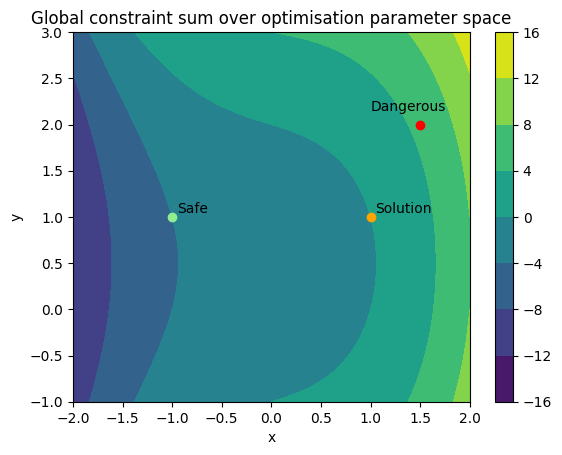

In [34]:
# con1 with uncertainty addition
def con1_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Value of constraint 1.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Value of constraint
    """
    # return (x[0] - 1) ** 3 - x[1] + 1 + e[0]
    return (x[0] + 2*e[0]) ** 3 - x[1]


def con2_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Value of constraint 2.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Value of constraint
    """
    # return x[0] + x[1] - 2
    return x[0] + (x[1]+e[1])**2 - 2


def constraints_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Calculate values of all constraints.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Values of all constraints
    """
    return np.array([con1_unc(x, e), con2_unc(x, e)])


def constraint_sum(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    # Find value of each constraint at each coordinate point
    cons = constraints_unc(x, e)
    # Return sum of constraints at each point
    return np.sum(cons, axis=0)

N = 300
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 3, N)
xx, yy = np.meshgrid(x, y)
# x_vec is vector containing x and y coordinate matrices
x_vec = np.array([xx, yy])

# Constraints with no uncertainties
con_sum = constraint_sum(x_vec, np.array([0.0, 0.0]))

fig, ax = plt.subplots()
contour_set = ax.contourf(x, y, con_sum)
# ax.axis("scaled")
fig.colorbar(contour_set)
ax.set_title("Global constraint sum over optimisation parameter space")
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.fill_between(x=x, y1=con1_line(x), y2=y.min(), alpha=0.3)
# ax.annotate("Constraint 1", (0.5, -0.25))
# ax.fill_between(x=x, y1=con2_line(x), y2=y.max(), alpha=0.3)
# ax.annotate("Constraint 2", (0.5, 2.0))

# Add solution point
ax.plot(1.0, 1.0, "o", color="orange")
ax.annotate("Solution", (1.05, 1.05))
ax.plot(-1.0, 1.0, "o", color="lightgreen")
ax.annotate("Safe", (-0.95, 1.05))
ax.plot(1.5, 2.0, "o", color="red")
ax.annotate("Dangerous", (1.0, 2.15))

The sum of the constraints is now more interesting. The solution is still feasible under no uncertainty.

## Local constraint space under uncertainty
Introduce some uncertainty to the constraints, then visualise the local uncertain constraint space (at a given point, i.e. the solution) under uncertainty.

Text(0, 0.5, 'e2')

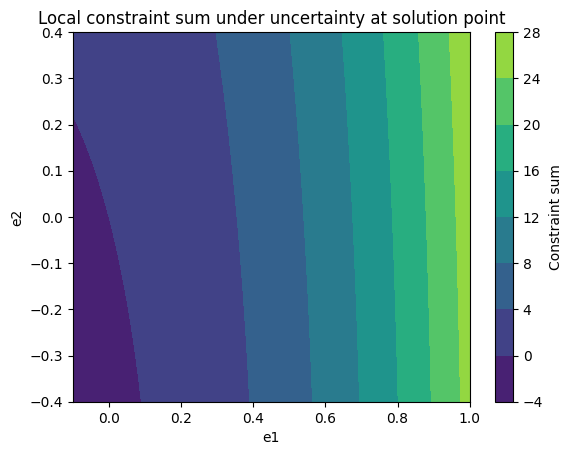

In [35]:
# Define epistemic uncertainty
# e1 = np.array([-0.1, 0.4])
e1 = np.array([-0.1, 1.0])
e2 = np.array([-0.4, 0.4])

# Define uncertainty space
e1_space = np.linspace(e1[0], e1[1], N)
e2_space = np.linspace(e2[0], e2[1], N)
e1_mesh, e2_mesh = np.meshgrid(e1_space, e2_space)
# unc_vec is vector containing e1 and e2 coordinate matrices
unc_vec = np.array([e1_mesh, e2_mesh])
# Local point (solution) to evaluate uncertain constraints at
sol_point = [1.0, 1.0]
con_sum_unc = constraint_sum(sol_point, unc_vec)

fig, ax = plt.subplots()
contour_set = ax.contourf(e1_space, e2_space, con_sum_unc, vmin=-5.4, vmax=32.0)
fig.colorbar(contour_set, label="Constraint sum")
ax.set_title("Local constraint sum under uncertainty at solution point")
ax.set_xlabel("e1")
ax.set_ylabel("e2")



Text(0, 0.5, 'e2')

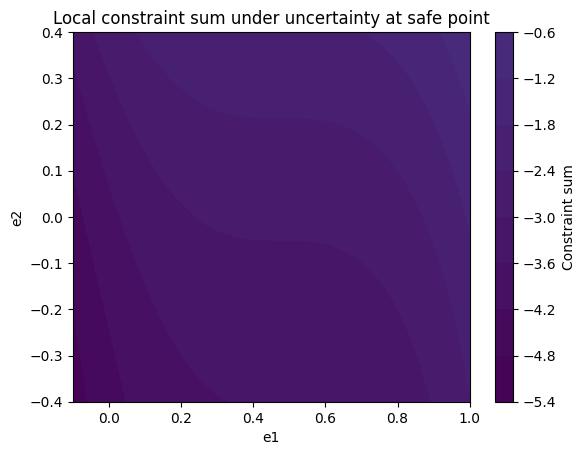

In [36]:
sol_point = [-0.95, 1.05]
con_sum_unc = constraint_sum(sol_point, unc_vec)

fig, ax = plt.subplots()
contour_set = ax.contourf(e1_space, e2_space, con_sum_unc, vmin=-5.4, vmax=32.0)
fig.colorbar(contour_set, label="Constraint sum")
ax.set_title("Local constraint sum under uncertainty at safe point")
ax.set_xlabel("e1")
ax.set_ylabel("e2")


Text(0, 0.5, 'e2')

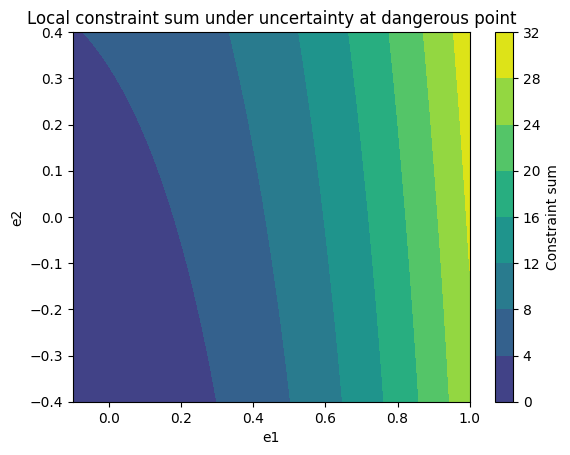

In [37]:
sol_point = [1.0, 2.155]
con_sum_unc = constraint_sum(sol_point, unc_vec)

fig, ax = plt.subplots()
contour_set = ax.contourf(e1_space, e2_space, con_sum_unc, vmin=-5.4, vmax=32.0)
fig.colorbar(contour_set, label="Constraint sum")
ax.set_title("Local constraint sum under uncertainty at dangerous point")
ax.set_xlabel("e1")
ax.set_ylabel("e2")